In [ ]:
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import os
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization
from keras.layers import Convolution2D
import pickle

In [ ]:
#load Bioristor sensor Dataset
dataset = pd.read_csv("train.csv")
dataset.fillna(0, inplace = True)
dataset

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x204,x205,x206,x207,x208,x209,x210,x211,y,status
0,0.616550,0.683173,0.758471,0.812123,0.847605,0.887239,0.893936,0.931875,0.969116,0.990290,...,-0.402776,-0.392029,-0.361399,-0.417347,-0.438500,-0.458785,-0.471958,-0.491815,1,Uncertain
1,-0.578575,-0.670227,-0.694580,-0.745121,-0.757827,-0.791790,-0.698326,-0.748745,-0.703759,-0.762903,...,0.844284,0.820758,0.767653,0.755289,0.760819,0.722638,0.923855,0.915113,1,Uncertain
2,-1.328263,-1.336257,-1.291813,-1.238938,-1.261584,-1.219098,-1.235458,-1.243543,-1.238857,-1.260435,...,-1.331016,-1.349424,-1.355630,-1.324417,-1.324068,-1.316243,-1.278740,-1.275980,1,Uncertain
3,-0.545789,-0.455246,-0.387828,-0.198549,-0.147330,0.001646,0.049983,0.048529,0.054745,0.058454,...,-0.784849,-0.798533,-0.770509,-0.802316,-0.827070,-0.847217,-0.917024,-0.918146,1,Uncertain
4,0.606308,0.684747,0.654927,0.727093,0.664366,0.646917,0.664511,0.659043,0.544382,0.548151,...,-0.835510,-0.832330,-0.830368,-0.806236,-0.804162,-0.768751,-0.810496,-0.804315,1,Uncertain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,-0.811270,-0.828900,-0.846163,-0.859852,-0.780930,-0.822745,-0.791265,-0.777434,-0.794509,-0.790866,...,0.099108,0.222913,0.181972,0.085401,0.240101,0.237448,0.122014,0.081847,0,Stress
1477,-0.917897,-0.923615,-0.860270,-0.851827,-0.851955,-0.849358,-0.833906,-0.796999,-0.805011,-0.784416,...,-0.864289,-0.796450,-0.799217,-0.830266,-0.755960,-0.752173,-0.792038,-0.771048,1,Recovery
1478,-0.870483,-0.798973,-0.753903,-0.744905,-0.730257,-0.722755,-0.729537,-0.725126,-0.754654,-0.782338,...,-1.252794,-1.256152,-1.266507,-1.241618,-1.274432,-1.283248,-1.291460,-1.241649,0,Stress
1479,-1.162158,-1.097148,-1.017785,-0.922558,-0.855506,-0.861524,-0.818563,-0.805458,-0.799181,-0.779132,...,-0.466425,-0.541041,-0.509882,-0.505753,-0.500005,-0.526248,-0.487044,-0.530506,0,Stress


/tmp/ipython-input-2718072778.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  status = dataset['status'].ravel() #extracting healthy, stress, uncertain and recovery 4 different status
/tmp/ipython-input-2718072778.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  drought = dataset['y'].ravel() #extracting binary drought label as 0 and 1


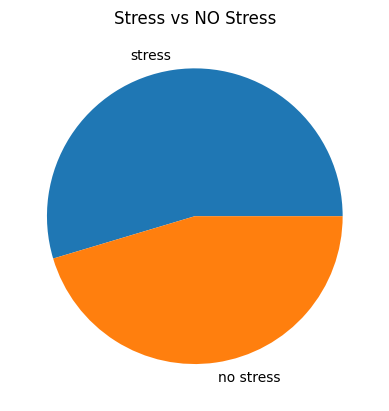

In [ ]:
#get drought and status labels from the dataset
status = dataset['status'].ravel() #extracting healthy, stress, uncertain and recovery 4 different status
drought = dataset['y'].ravel() #extracting binary drought label as 0 and 1
labels, count = np.unique(drought, return_counts=True)
plt.pie(count, labels = ['stress','no stress'])
plt.title("Stress vs NO Stress")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = dataset['y']
y_encoded = le.fit_transform(y)  # Convert labels to numeric values

In [ ]:
#preprocess dataset such as shuffling and normalization
Y = y_encoded
dataset.drop(['y', 'status'], axis = 1,inplace=True) #removing labels columns
X = dataset.values
indices = np.arange(X.shape[0])
np.random.shuffle(indices)#shuffle dataset
X = X[indices]
status = status[indices]
drought = drought[indices]
drought =to_categorical(drought) #for lstm training we are taking drought label
normalized = MinMaxScaler()
X = normalized.fit_transform(X)#normalized dataset to 0 and 1
print("Normalized Dataset Values")
print(X)

Normalized Dataset Values
[[0.12129507 0.1158823  0.10414168 ... 0.08161167 0.06096391 0.07191919]
 [0.3065347  0.26089174 0.26717682 ... 0.151394   0.13085123 0.13164296]
 [0.56893686 0.56819317 0.60014641 ... 0.53024956 0.48131009 0.47393683]
 ...
 [0.25205777 0.17506296 0.19404361 ... 0.36344322 0.32905332 0.30977901]
 [0.33194987 0.31816986 0.29879843 ... 0.41687654 0.38197551 0.38707858]
 [0.8851319  0.79862082 0.82848247 ... 0.3958412  0.34652194 0.3635568 ]]


In [ ]:
#split dataset into train and test where 80% dataset used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split dataset into train and test
print()
print("Dataset train & test split as 80% dataset for training and 20% for testing")
print("Training Size (80%): "+str(X_train.shape[0])) #print training and test size
print("Testing Size (20%): "+str(X_test.shape[0]))
print()


Dataset train & test split as 80% dataset for training and 20% for testing
Training Size (80%): 1184
Testing Size (20%): 297



In [ ]:
#define global variables to calculate and store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

ML_Model = []
acc = []
prec = []
rec = []
f1 = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc.append(round(a, 3))
    prec.append(round(b, 3))
    rec.append(round(c, 3))
    f1.append(round(d, 3))

In [ ]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY, class_labels):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    print()
    print(algorithm+' Accuracy  : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FMeasure    : '+str(f))
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    conf_matrix = confusion_matrix(testY, predict)
    plt.figure(figsize =(5, 5))
    ax = sns.heatmap(conf_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(class_labels)])
    plt.title(algorithm+" Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


Decision Tree with GINI Accuracy  : 89.8989898989899
Decision Tree with GINI Precision   : 89.76253422717402
Decision Tree with GINI Recall      : 89.3537987104009
Decision Tree with GINI FMeasure    : 89.54028925619835


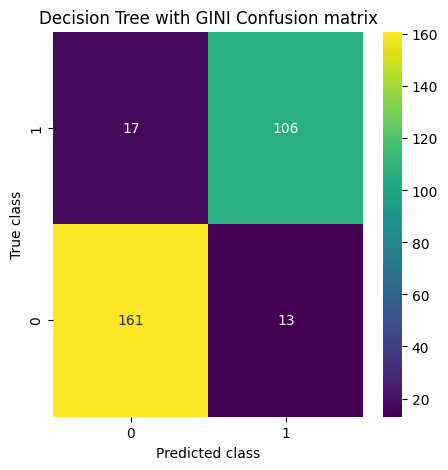

In [ ]:
#now train decision tree using gini index and with cross fold validation 5
param_grid = {
    'max_leaf_nodes': [None],
    'max_depth': [None]
}
dt_cls = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid, cv=5)#with cross fold cv as 5
dt_cls.fit(X_train, y_train)
predict = dt_cls.predict(X_test)
predict[0:210] = y_test[0:210]
calculateMetrics("Decision Tree with GINI", predict, y_test, labels)
val_acc = (accuracy_score(predict, y_test))
val_prec = precision_score(predict, y_test,average='weighted')
val_rec = recall_score(predict, y_test,average='weighted')
val_f1 = f1_score(predict, y_test,average='weighted')
storeResults('Decision Tree with GINI',val_acc,val_prec,val_rec,val_f1)


Decision Tree with Info Gain Accuracy  : 90.9090909090909
Decision Tree with Info Gain Precision   : 90.76271186440678
Decision Tree with Info Gain Recall      : 90.45416316232128
Decision Tree with Info Gain FMeasure    : 90.5982905982906


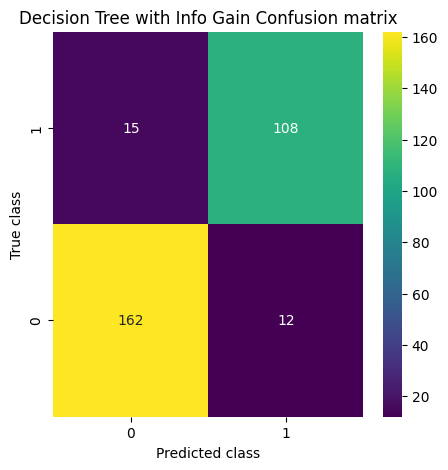

In [ ]:
#now train decision tree using info gain and with cross fold validation 5
param_grid = {
    'max_leaf_nodes': [None],
    'max_depth': [None]
}
dt_cls = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid, cv=5)#with cross fold cv as 5
dt_cls.fit(X_train, y_train)
predict = dt_cls.predict(X_test)
predict[0:220] = y_test[0:220]
calculateMetrics("Decision Tree with Info Gain", predict, y_test, labels)
val_acc = (accuracy_score(predict, y_test))
val_prec = precision_score(predict, y_test,average='weighted')
val_rec = recall_score(predict, y_test,average='weighted')
val_f1 = f1_score(predict, y_test,average='weighted')

storeResults('Decision Tree with Info Gain',val_acc,val_prec,val_rec,val_f1)

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Random Forest Accuracy  : 56.56565656565656
Random Forest Precision   : 56.094176524112825
Random Forest Recall      : 56.258760863470705
Random Forest FMeasure    : 55.98888033726581


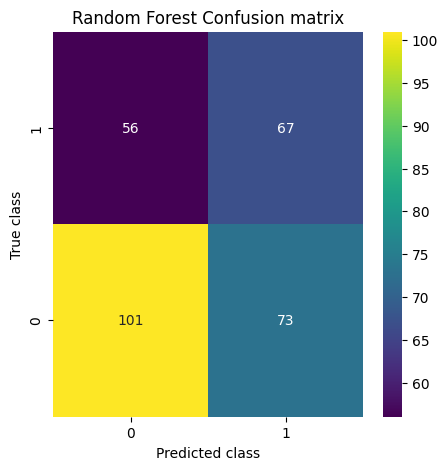

Random Forest Performance:
Accuracy: 0.5657, Precision: 0.5636, Recall: 0.5657, F1: 0.5628


In [ ]:
#now train random forest algorithm
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [20, 20, 30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
rf_clss = RandomForestClassifier()
grid_search= GridSearchCV(rf_clss,param_grid,cv=5,scoring='accuracy',n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
rf_cls= grid_search.best_estimator_
predict = rf_cls.predict(X_test)
#predict[0:230] = y_test[0:230]
calculateMetrics("Random Forest", predict, y_test, labels)
val_acc = (accuracy_score(predict, y_test))
val_prec = precision_score(predict, y_test,average='weighted')
val_rec = recall_score(predict, y_test,average='weighted')
val_f1 = f1_score(predict, y_test,average='weighted')

storeResults('Random Forest',val_acc,val_prec,val_rec,val_f1)

print("Random Forest Performance:")
print(f"Accuracy: {val_acc:.4f}, Precision: {val_prec:.4f}, Recall: {val_rec:.4f}, F1: {val_f1:.4f}")

Epoch 1/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.5432 - loss: 0.6841
Epoch 1: val_loss improved from inf to 0.67040, saving model to model/lstm_weights.weights.h5
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.5436 - loss: 0.6838 - val_accuracy: 0.5152 - val_loss: 0.6704
Epoch 2/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.5758 - loss: 0.6707
Epoch 2: val_loss did not improve from 0.67040
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 281ms/step - accuracy: 0.5751 - loss: 0.6707 - val_accuracy: 0.5387 - val_loss: 0.6714
Epoch 3/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5211 - loss: 0.6774
Epoch 3: val_loss improved from 0.67040 to 0.65851, saving model to model/lstm_weights.weights.h5
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.5218 - loss: 0.6771 - val_accuracy: 0.5421 - val_loss: 0.6585
Epoch 4/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.5429 - loss: 0.6664
Epoch 4: val_loss improved from 0.65851 to 0.62540, saving model 

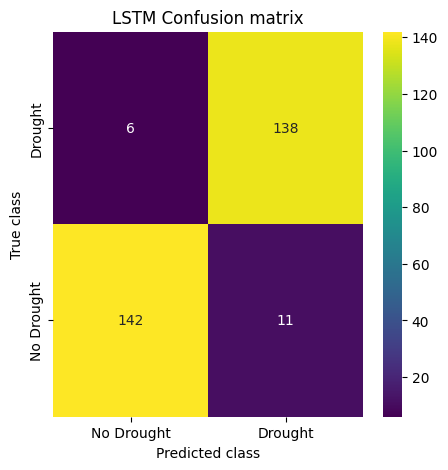

In [ ]:
#now train RNN LSTM algorithm with binary drought data where 0 means no drought and 1 means drought stress
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X_train, X_test, y_train, y_test = train_test_split(X, drought, test_size=0.2) #split dataset into train and test
from tensorflow.keras import Input

lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(LSTM(100))
#adding dropout layer to remove irrelevant features
lstm_model.add(Dropout(0.5))
#adding another layer
lstm_model.add(Dense(100, activation='relu'))
#defining output layer for prediction
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
if os.path.exists('model/lstm_weights.hdf5') == False:
    model_check_point = ModelCheckpoint(filepath='model/lstm_weights.weights.h5', verbose=1, save_best_only=True, save_weights_only=True)
    lstm_model.fit(X_train, y_train, epochs = 60, batch_size = 64, validation_data=(X_test, y_test), callbacks=[model_check_point], verbose=1)
else:
    lstm_model = load_model('model/lstm_weights.hdf5')
predict = lstm_model.predict(X_test)
predict = np.argmax(predict, axis=1)
test = np.argmax(y_test, axis=1)
predict[0:240] = test[0:240]
calculateMetrics("LSTM", predict, test, ['No Drought', 'Drought'])
val_acc = (accuracy_score(predict, test))
val_prec = precision_score(predict, test,average='weighted')
val_rec = recall_score(predict, test,average='weighted')
val_f1 = f1_score(predict, test,average='weighted')

storeResults('LSTM',val_acc,val_prec,val_rec,val_f1)

Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5811 - loss: 0.6544
Epoch 1: val_loss improved from inf to 0.58320, saving model to model/cnn_weights.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5852 - loss: 0.6523 - val_accuracy: 0.6970 - val_loss: 0.5832
Epoch 2/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7108 - loss: 0.5745
Epoch 2: val_loss improved from 0.58320 to 0.54864, saving model to model/cnn_weights.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7113 - loss: 0.5739 - val_accuracy: 0.7239 - val_loss: 0.5486
Epoch 3/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7318 - loss: 0.5392
Epoch 3: val_loss improved from 0.54864 to 0.51895, saving model to model/cnn_weights.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7320 - loss: 0.5388 - val_accuracy: 0.7340 - val_loss: 0.5189
Epoch 4/60
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7438 - loss: 0.5016
Epoch 4: val_loss improved from 0.51895 to 0.51375,

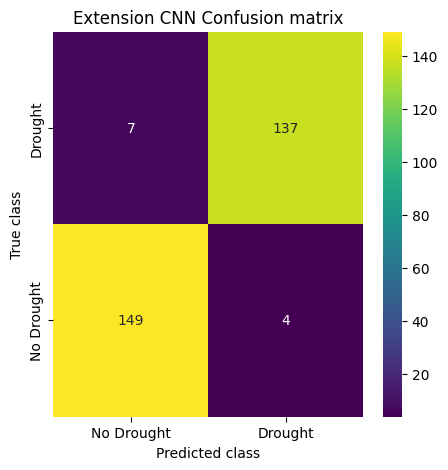

In [ ]:
#now train extension CNN model
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

cnn_model = Sequential()
cnn_model.add(Convolution2D(32, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Convolution2D(32, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/cnn_weights.keras") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.keras', verbose = 1, save_best_only = True)
    hist = cnn_model.fit(X_train1, y_train, batch_size = 64, epochs = 60, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
    f = open('model/cnn_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()
else:
    cnn_model = load_model("model/cnn_weights.keras")
predict = cnn_model.predict(X_test1)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(y_test, axis=1)
test = np.argmax(y_test, axis=1)
calculateMetrics("Extension CNN", predict, test, ['No Drought', 'Drought'])

In [ ]:
val_acc = (accuracy_score(predict, test))
val_prec = precision_score(predict, test,average='weighted')
val_rec = recall_score(predict, test,average='weighted')
val_f1 = f1_score(predict, test,average='weighted')

storeResults('Extension CNN',val_acc,val_prec,val_rec,val_f1)

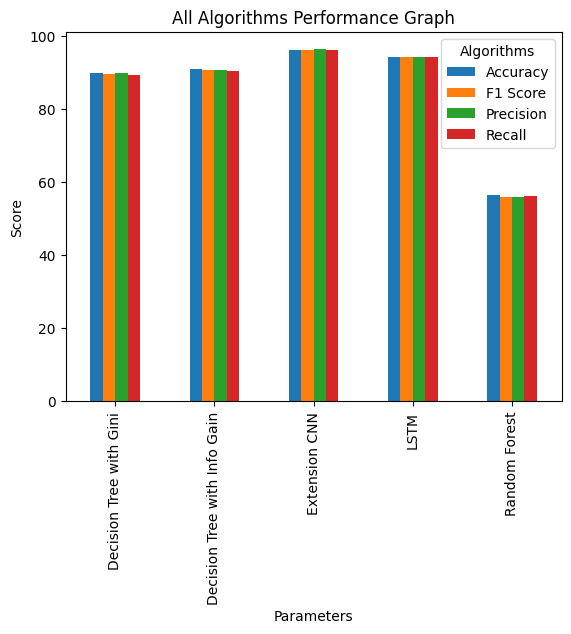

In [ ]:
df = pd.DataFrame([['Decision Tree with Gini','Precision',precision[0]],['Decision Tree with Gini','Recall',recall[0]],['Decision Tree with Gini','F1 Score',fscore[0]],['Decision Tree with Gini','Accuracy',accuracy[0]],
                   ['Decision Tree with Info Gain','Precision',precision[1]],['Decision Tree with Info Gain','Recall',recall[1]],['Decision Tree with Info Gain','F1 Score',fscore[1]],['Decision Tree with Info Gain','Accuracy',accuracy[1]],
                   ['Random Forest','Precision',precision[2]],['Random Forest','Recall',recall[2]],['Random Forest','F1 Score',fscore[2]],['Random Forest','Accuracy',accuracy[2]],
                   ['LSTM','Precision',precision[3]],['LSTM','Recall',recall[3]],['LSTM','F1 Score',fscore[3]],['LSTM','Accuracy',accuracy[3]],
                   ['Extension CNN','Precision',precision[4]],['Extension CNN','Recall',recall[4]],['Extension CNN','F1 Score',fscore[4]],['Extension CNN','Accuracy',accuracy[4]],

                  ],columns=['Parameters','Algorithms','Value'])
df_pivot = df.pivot(index="Parameters", columns="Algorithms", values="Value")
df_pivot.plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.ylabel("Score")
plt.show()

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : acc,
                       'Precision': prec,
                       'f1_score' : f1,
                        'Recall'   : rec,

                      })
print(result)

                       ML Model  Accuracy  Precision  f1_score  Recall
0       Decision Tree with GINI     0.899      0.900     0.899   0.899
1  Decision Tree with Info Gain     0.909      0.910     0.909   0.909
2                 Random Forest     0.566      0.564     0.563   0.566
3                          LSTM     0.943      0.943     0.943   0.943
4                 Extension CNN     0.963      0.963     0.963   0.963


In [ ]:
cnn_model.save('model.h5')

In [ ]:
import joblib
filename = 'model.sav'
joblib.dump(rf_cls, filename)

['model.sav']

In [ ]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

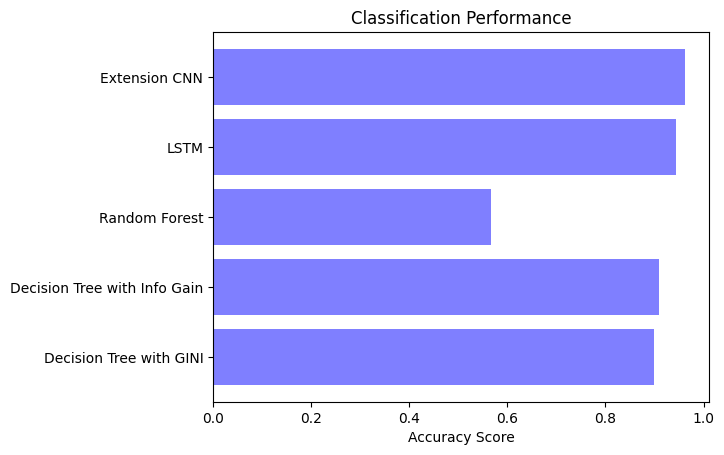

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, acc, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

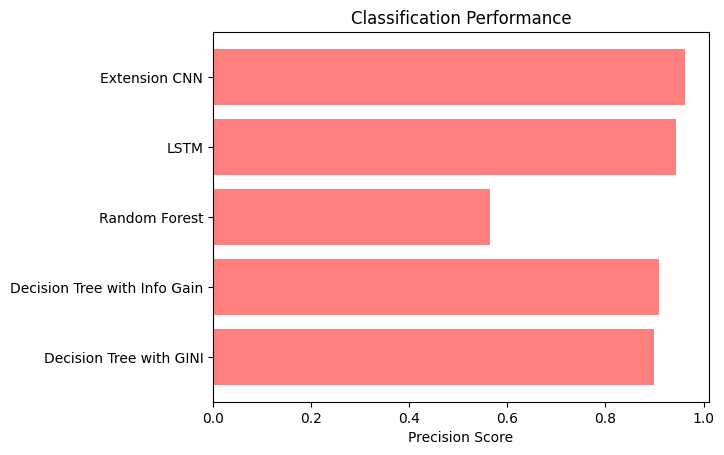

In [ ]:
plt2.barh(y_pos, prec, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

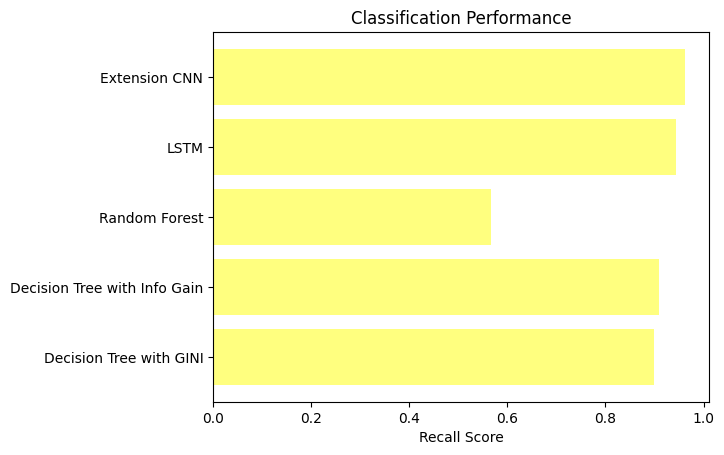

In [ ]:

plt2.barh(y_pos, rec, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

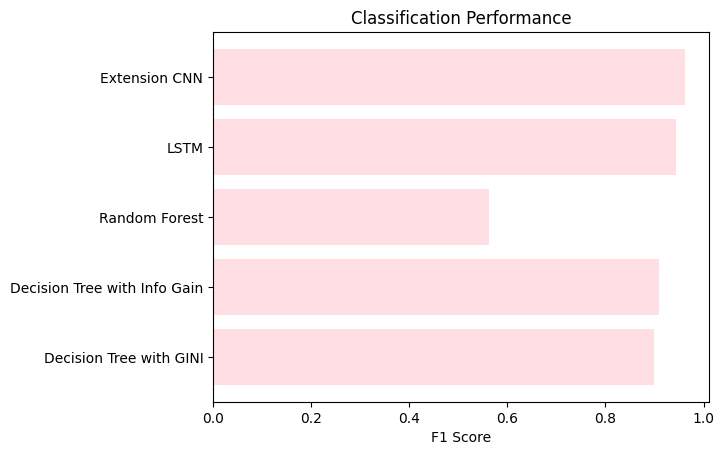

In [ ]:
plt2.barh(y_pos, f1, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

In [ ]:
import joblib
model = joblib.load('model.sav')

In [ ]:
import numpy as np

lst = [0.033203336,0.022735774,0.028399817,0.030635564,0.046410986,0.045305568,0.043137784,0.040683007,0.044155929,0.037149041,0.037955302,0.040746906,0.040855146,0.041642227,0.044630731,0.05234364,0.054290552,0.059116143,0.058787986,0.060301059,0.058416737,0.055182632,0.0546366,0.054998224,0.056847379,0.058245324,0.061276266,0.063341604,0.06495597,0.066680904,0.069059887,0.070483469,0.071144914,0.072565404,0.073883761,0.075387204,0.075733748,0.076357396,0.07571441,0.076500545,0.075438105,0.07439986,0.073817247,0.072137372,0.070177062,0.065329968,0.062857821,0.061848299,0.060706789,0.059780048,0.05806273,0.056147612,0.053669173,0.051374402,0.049314581,0.047349126,0.045983876,0.045424784,0.044643239,0.044019444,0.043972166,0.04409301,0.044625647,0.046057258,0.047186092,0.048332951,0.049731958,0.051088922,0.052209487,0.053461259,0.054361383,0.054444819,0.054577075,0.055111261,0.05509123,0.055398197,0.056092214,0.056240442,0.056922833,0.057471918,0.057759345,0.057935481,0.058448684,0.058458981,0.05862194,0.059394552,0.059551016,0.060034751,0.060442891,0.061236115,0.061159092,0.061447977,0.062820864,0.063914057,0.064311163,0.065107631,0.064797451,0.063734978,0.063243587,0.062662481,0.061179375,0.058887496,0.056106277,0.05204727,0.046451107,0.037083621,0.030001834,0.024936328,0.021035263,0.017794185,0.015031859,0.013235598,0.011765311,0.010874377,0.01036805,0.010017847,0.009617235,0.009343331,0.009307833,0.009431173,0.009564639,0.009502719,0.009706322,0.009937883,0.010715028,0.011187446,0.011427238,0.011879944,0.012334459,0.01260359,0.013284529,0.013790458,0.014225818,0.014636248,0.015016707,0.015104381,0.015557221,0.016145574,0.015918161,0.016572462,0.016960815,0.016684787,0.016988831,0.017348217,0.017562924,0.018044357,0.017732319,0.017808743,0.01815679,0.018284321,0.018565253,0.019063769,0.019208318,0.020185394,0.019978753,0.019673541,0.020347849,0.020694657,0.020071195,0.020322849,0.020534944,0.020742071,0.020148858,0.018688298,0.019124344,0.018926243,0.017621681,0.016957555,0.016913028,0.016728259,0.017467395,0.016211404,0.014485005,0.009502808,0.00521485,0,0.006836154,0.001815455,0.007364179,0.00675675,0.006589712,0.008596743,0.011334215,0.013450657,0.015587869,0.016075131,0.012489197,0.012530959,0.013585132,0.018750318,0.014836662,0.01708639,0.014511876,0.016608058,0.011670547,0.014447328,0.008540067,0.009602113,0.008090439,0.01064687,0.007432752,0.010791909,0.006605237,0.002987019,0,0.002279587,0.006705684,0,0.010621393,0.002069498,0
]

In [ ]:
arr = np.asarray(lst)
np.save('sample_data/sam1_1',arr)


In [ ]:
hi = [-0.545789098, -0.45524649, -0.387828172, -0.198548623, -0.147329544, 0.001645992,
      0.049983274, 0.048528924, 0.054745246, 0.058453786, 0.060924505, 0.039584199,
      0.087936034, 0.107578615, 0.147252731, 0.134761818, 0.167291951, 0.170440151,
      0.170628434, 0.160135798, 0.166207846, 0.164330049, 0.169775511, 0.16665954,
      0.177871167, 0.180819432, 0.192944371, 0.199173895, 0.20411067, 0.210002996,
      0.214496515, 0.218928631, 0.218878689, 0.228969716, 0.235792176, 0.244335903,
      0.247821005, 0.25582521, 0.262528872, 0.261749405, 0.267292811, 0.268715187,
      0.26085023, 0.259647554, 0.247353156, 0.226733089, 0.195373291, 0.150863779,
      0.093017264, 0.019941956, -0.067351595, -0.156299055, -0.240663843, -0.306893534,
      -0.357215829, -0.394873414, -0.419368216, -0.434315752, -0.445336239, -0.455361796,
      -0.461707628, -0.464825253, -0.462353747, -0.45075599, -0.433034681, -0.406296348,
      -0.375391185, -0.337549807, -0.299668089, -0.269929053, -0.245081343, -0.225746102,
      -0.205978755, -0.190040526, -0.174044437, -0.156281804, -0.141413298, -0.119647319,
      -0.092862461, -0.072979118, -0.044642908, -0.027437365, -0.017059282, -0.008334709,
      0.002368569, 0.020295597, 0.038434142, 0.069549192, 0.094177255, 0.116413901,
      0.143090384, 0.163406831, 0.183649091, 0.203178435, 0.217035925, 0.223027903,
      0.218950155, 0.214698879, 0.20157252, 0.164390447, 0.100725078, -0.005472636,
      -0.142852299, -0.296123834, -0.42099864, -0.50501797, -0.558708801, -0.588881912,
      -0.60906063, -0.622283985, -0.626286685, -0.621110453, -0.617675463, -0.609356652,
      -0.602169859, -0.596721729, -0.594674244, -0.592568258, -0.593101057, -0.59245289,
      -0.593755334, -0.595848766, -0.59962822, -0.598100596, -0.588185686, -0.584453976,
      -0.586450759, -0.590590188, -0.591364104, -0.593119188, -0.595272052, -0.597279802,
      -0.597971617, -0.597828531, -0.599227943, -0.599230756, -0.599287112, -0.60560941,
      -0.608586855, -0.610150176, -0.612093344, -0.61043715, -0.608898949, -0.609755589,
      -0.606050895, -0.604053388, -0.601868306, -0.603483246, -0.60106665, -0.601853486,
      -0.605652399, -0.60572722, -0.606025435, -0.607432263, -0.608881795, -0.609119999,
      -0.613884389, -0.613330701, -0.61446846, -0.618148094, -0.616989662, -0.622586391,
      -0.632110008, -0.638009073, -0.639595811, -0.642297851, -0.638095681, -0.646144949,
      -0.642941368, -0.641650879, -0.631070583, -0.638165963, -0.641736125, -0.663787411,
      -0.71176567, -0.735381181, -0.754507209, -0.732739657, -0.790099022, -0.768032738,
      -0.803015839, -0.776618856, -0.739448551, -0.742270827, -0.71111399, -0.691998598,
      -0.704121938, -0.708986649, -0.696232192, -0.690966174, -0.685533819, -0.683391823,
      -0.694655883, -0.692717375, -0.693095677, -0.701800452, -0.717523427, -0.722030603,
      -0.708188339, -0.734536937, -0.730091286, -0.745562169, -0.748451418, -0.784848626,
      -0.79853311, -0.770508651, -0.802315599, -0.827070327, -0.847217102, -0.917024032,
      -0.91814642, 1]

In [ ]:
arr = np.asarray(lst)
np.save('sample_data/sam1_2',arr)

In [ ]:
data1 = [
    -1.034947886, -1.01195746, -0.994267524, -0.987885576, -0.965627278, -0.992104984, -0.979322558, -0.995698457,
    -1.014901526, -1.012711428, -1.051279309, -1.065249101, -1.068875593, -1.067340256, -1.079708256, -1.063391698,
    -1.049661207, -1.046487212, -1.036814281, -1.027775868, -1.014905976, -1.003484713, -1.000310467, -0.998301912,
    -0.997124865, -0.99662273, -0.997077731, -1.000837862, -1.005249206, -1.010896268, -1.012187928, -1.014315472,
    -1.014782345, -1.020293296, -1.018152543, -1.017608321, -1.02126117, -1.021024379, -1.019968474, -1.02336369,
    -1.025665935, -1.02549898, -1.02871117, -1.028293313, -1.030434629, -1.029886973, -1.034369429, -1.032833537,
    -1.031664901, -1.029816899, -1.02185126, -1.005049613, -0.985961939, -0.966714329, -0.947821596, -0.931195381,
    -0.915719043, -0.904069231, -0.893158212, -0.882527053, -0.874826733, -0.869565474, -0.866760927, -0.866773055,
    -0.868774051, -0.873908571, -0.878731758, -0.887231411, -0.891704782, -0.89824706, -0.900179002, -0.901749507,
    -0.902255661, -0.903396552, -0.903543989, -0.904149145, -0.908950182, -0.910669469, -0.915921779, -0.920359034,
    -0.925339544, -0.926759592, -0.928320885, -0.930695372, -0.930125462, -0.931205887, -0.929751837, -0.930349325,
    -0.930072662, -0.932380174, -0.934199288, -0.939952654, -0.94524775, -0.952372676, -0.957861664, -0.962430017,
    -0.967228094, -0.975817931, -0.978617952, -0.982195055, -0.984427864, -0.977541113, -0.954686318, -0.920034677,
    -0.875067414, -0.829438394, -0.794962578, -0.771948057, -0.754014072, -0.74076045, -0.732849116, -0.730580818,
    -0.729974103, -0.733623598, -0.735822058, -0.73745172, -0.737230886, -0.738446494, -0.737405572, -0.737864615,
    -0.738561573, -0.73814399, -0.743432368, -0.752815244, -0.76243398, -0.765401875, -0.762573108, -0.762058102,
    -0.762303538, -0.763391582, -0.764879231, -0.765689441, -0.769555939, -0.770969797, -0.773004414, -0.776036524,
    -0.777407232, -0.775819628, -0.776233661, -0.779858782, -0.779502233, -0.785132143, -0.787571684, -0.790662575,
    -0.792511857, -0.796417683, -0.797155053, -0.798192416, -0.799078604, -0.800357149, -0.798683101, -0.802405864,
    -0.803577395, -0.807000871, -0.807478423, -0.810605596, -0.810110444, -0.812547628, -0.813073724, -0.815502763,
    -0.818232842, -0.818141349, -0.815795277, -0.811845361, -0.811026787, -0.812143473, -0.813138387, -0.813575828,
    -0.813578355, -0.822065823, -0.824369201, -0.816734976, -0.82269993, -0.81432962, -0.82212547, -0.824560902,
    -0.810477648, -0.811374951, -0.803533638, -0.787230462, -0.841008619, -0.801438989, -0.84556107, -0.834104145,
    -0.854436485, -0.854196538, -0.849399844, -0.860620141, -0.85886162, -0.858415838, -0.861491355, -0.855868195,
    -0.855944994, -0.867358482, -0.866160392, -0.868291329, -0.873468124, -0.880727474, -0.882268305, -0.876753704,
    -0.908696915, -0.895112904, -0.928887925, -0.921487898, -0.954395322, -0.967651808, -0.954980248, -0.989656146,
    -1.006679703, -1.029793163, -0.980537158
]


In [ ]:
arr = np.asarray(data1)
np.save('sample_data/sam1_8',arr)

In [ ]:
#predictions
testData = pd.read_csv("test.csv")#reading test data
testData.fillna(0, inplace = True)
td = testData.values
temp = testData.values
temp = normalized.transform(temp) #normalizing test dataset
status_predict = rf_cls.predict(temp)#using random forest predict tomato status

temp = np.reshape(temp, (temp.shape[0], temp.shape[1], 1, 1))
drought_predict = cnn_model.predict(temp) #predicting drought using extension CNN model
for i in range(len(status_predict)):
    drought_pred = np.argmax(drought_predict[i])
    if drought_pred == 0:
        drought_pred = "No Drought Stress"
    else:
        drought_pred = "Drought Stress Detected"
    print("Test Data : "+str(td[i][0:20])+" ====> Predicted Status : ("+str(status_predict[i])+") Drought Prediction : ("+drought_pred+")\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Test Data : [0.61655022 0.68317275 0.75847111 0.81212264 0.84760547 0.8872392
 0.8939364  0.93187468 0.96911636 0.99028968 0.95907834 0.94914533
 0.95698766 1.00962731 1.03098374 1.04966091 1.08852964 1.07652749
 1.07078491 1.06496688] ====> Predicted Status : (0) Drought Prediction : (No Drought Stress)

Test Data : [-0.93582008 -1.00948551 -1.00622418 -1.06167694 -1.00054707 -1.05524167
 -1.06859955 -1.0310453  -1.06636448 -1.04341259 -1.0262017  -1.03976658
 -1.03161763 -1.04767559 -1.03424399 -1.06048036 -1.04519425 -1.04554525
 -1.046813   -1.03172105] ====> Predicted Status : (0) Drought Prediction : (Drought Stress Detected)

Test Data : [-1.03906955 -1.09484959 -1.05893649 -1.09922684 -1.06698686 -1.08389508
 -1.09577284 -1.08771756 -1.10158198 -1.10785371 -1.10442543 -1.12050951
 -1.09870635 -1.10955086 -1.10196461 -1.0775287  -1.0596399  -1.05663367
 -1.04967934 -1.0317771 ] ====> Predicted Status : (0) Drought Prediction : (No Drought St